## How countries see Hamas:

This graph was inspired by the following tweet:

https://twitter.com/stats_feed/status/1712748604413051097

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import warnings
warnings.filterwarnings('ignore')

In [17]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Get country shapes

In [18]:
gdf = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres")
)

In [19]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Identify allies/foes of Hamas

In [20]:
ally_states = ["Afghanistan", "Algeria", "Iran", "Qatar", "Syria"]

In [21]:
gdf["ally"] = gdf["name"].isin(ally_states)

In [22]:
foe_states = ["Australia", "Canada", "Israel", "Japan", "Paraguay", "United Kingdom", "United States"]

In [23]:
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland",
    "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", 
    "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"
]

In [24]:
gdf["foes"] = gdf["name"].isin([*foe_states, *eu_countries])

In [25]:
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ally,foes
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",False,False
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",False,False
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",False,False
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",False,True
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",False,False
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",False,False
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",False,False
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",False,False
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",False,False


In [26]:
gdf["category"] = gdf["ally"].astype(int) - gdf["foes"].astype(int)

In [27]:
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ally,foes,category
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",False,False,0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",False,False,0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",False,False,0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",False,True,-1
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",False,False,0
...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",False,False,0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",False,False,0
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",False,False,0
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",False,False,0


## Plot the map

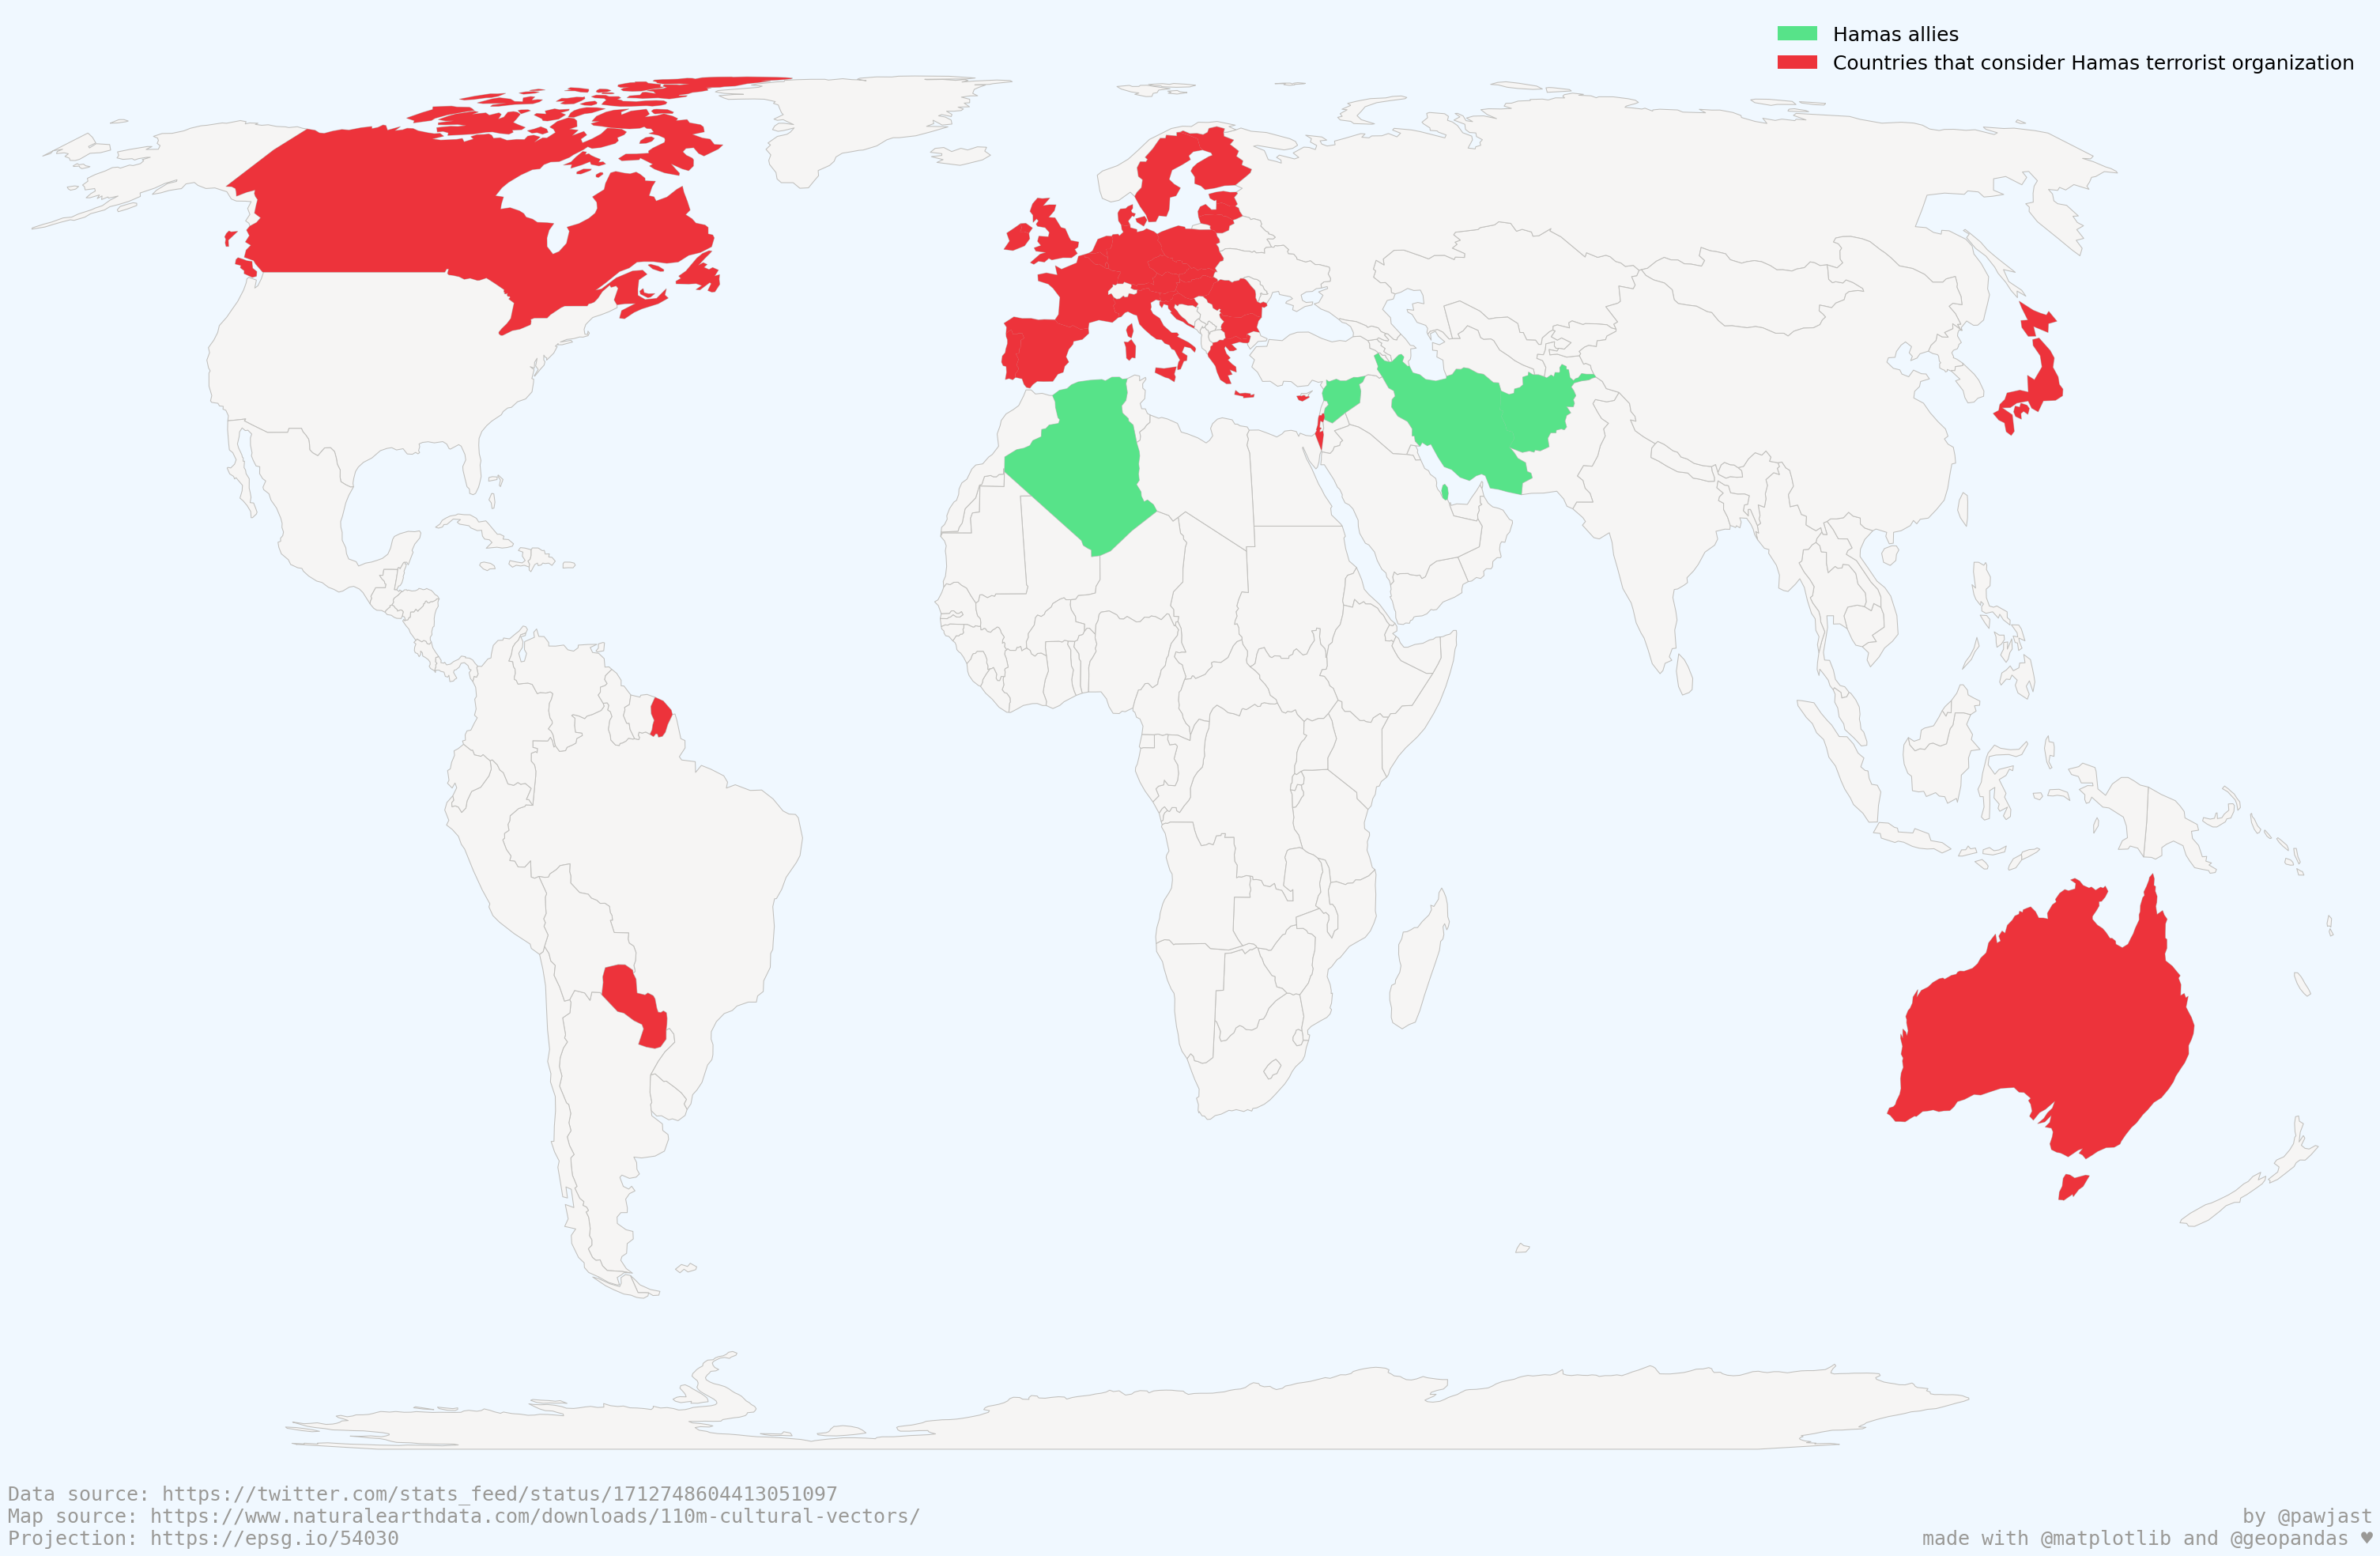

In [28]:
fig, ax = plt.subplots(
    figsize=(30, 20),
    facecolor=("aliceblue"),
    layout="constrained"
)

gdf.to_crs('ESRI:54012').plot(
    ax=ax,
    lw=0.75,
    edgecolor="#c0bfbc",
    facecolor="#f6f5f4",
)
gdf[gdf["ally"]].to_crs('ESRI:54012').plot(
    ax=ax,
    facecolor="#57e389"  # green
)
gdf[gdf["foes"]].to_crs('ESRI:54012').plot(
    ax=ax,
    facecolor="#ed333b"  # red
)

ax.set_xlim(
    (-13_000_000, 16_000_000)
)

# Using proxy rectangles to create legend
ax.legend(
    [
        Rectangle((0, 0), 1, 1, fc="#57e389"),
        Rectangle((0, 0), 1, 1, fc="#ed333b")
    ],
    [
        "Hamas allies",
        "Countries that consider Hamas terrorist organization"
    ],
    fontsize=18,
    frameon=False
)

ax.text(
    1, -0.02,
    "by @pawjast\nmade with @matplotlib and @geopandas \u2665",
    transform =ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=18,
    family="monospace",
    weight="medium"
)
ax.text(
    0.0, -0.02,
    "Data source: https://twitter.com/stats_feed/status/1712748604413051097\nMap source: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/\nProjection: https://epsg.io/54030",
    transform =ax.transAxes,
    horizontalalignment="left",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=18,
    family="monospace",
    weight="medium"
)


ax.set_axis_off()

# plt.savefig(
#     fname="pawjast.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );